In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

In [ ]:
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [ ]:
v= CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [ ]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [ ]:
corpus = [
    'thor ate pizza',
    'loki is tall',
    'loki is eating pizza.'
]

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
  doc = nlp(text)
  filter_token = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filter_token.append(token.lemma_)

  return ' '.join(filter_token)

In [ ]:
preprocess("Thor ate pizza")

'thor eat pizza'

In [ ]:
corpus_preprocess = [ preprocess(text) for text in corpus]
corpus_preprocess

['thor eat pizza', 'loki tall', 'loki eat pizza']

In [ ]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_preprocess)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [ ]:
v.transform(['thor eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [ ]:
#  take corpus out off vocab
v.transform(['hulk eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

***News Category Classification Problem***

In [ ]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/nlp files/news_dataset.json')
df.head()

,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [ ]:
df['category'].value_counts()

,count
category,
CRIME,2500
SPORTS,2500
BUSINESS,2500


In [ ]:
target = {'CRIME':0,'SPORTS':1,'BUSINESS':2}
df['target'] = df['category'].map(target)
df.head()

,text,category,target
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2


***Build a model with original text (no pre processing)***

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df['text'],df['target'],test_size=0.2)

In [ ]:
x_train.shape,x_test.shape

((6000,), (1500,))

In [ ]:
x_train.head()

,text
5438,Brazil Finally Wins Olympic Soccer Gold And Ev...
557,Dad Arrested In Death of 3-Year-Old Now Says S...
2021,Microsoft Just Took A Step Toward Actual Gende...
4195,Young Fan Runs Onto Court To Give Carmelo Anth...
2610,Lender Discrimination May Be Pushing Black Chu...


In [ ]:
y_train.head()

,target
5438,1
557,0
2021,2
4195,1
2610,2


In [ ]:
y_train.value_counts()

,count
target,
2,2012
0,1999
1,1989


In [ ]:
y_test.value_counts()

,count
target,
1,511
0,501
2,488


***Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model***

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range=(1,1))),
    ('NB',MultinomialNB())
])

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       501
           1       0.93      0.90      0.92       511
           2       0.90      0.92      0.91       488

    accuracy                           0.91      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.91      0.91      0.91      1500



In [ ]:
x_test[:5]

,text
6906,"Does Your Business Deserve $25,000 Plus Mentor..."
4706,"Saints Fan Steals Ball, Breaks Bengals Fan's H..."
3803,CHARTS: How Much More Expensive Life Has Gotte...
560,Walgreens Broaches Possible Health Benefits Of...
5766,Staten Island Teen Dies From Asthma While Flee...


In [ ]:
y_pred[:5]

array([2, 1, 2, 2, 0])

In [ ]:
y_test[:5]

,target
6906,2
4706,1
3803,2
560,2
5766,0


***Attempt 2 : Use 1-gram and bigrams***

In [ ]:
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range=(1,2))),
    ('NB',MultinomialNB())
])

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       501
           1       0.95      0.87      0.91       511
           2       0.86      0.94      0.90       488

    accuracy                           0.90      1500
   macro avg       0.91      0.91      0.90      1500
weighted avg       0.91      0.90      0.90      1500



***Attempt 3 : Use 1-gram to trigrams***

In [ ]:
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range=(1,3))),
    ('NB',MultinomialNB())
])

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       501
           1       0.96      0.86      0.90       511
           2       0.84      0.95      0.89       488

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



***Use text pre-processing to remove stop words, punctuations and apply lemmatization***

In [ ]:
df.head()

,text,category,target
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2


In [ ]:
#  preprocessing the text

df['preprocess_text'] = df['text'].apply(preprocess)

In [ ]:
df.head()

,text,category,target,preprocess_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall Horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,Vegas Taxpayers spend Record $ 750 million New...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['preprocess_text'],df['target'],test_size=0.2)

In [ ]:
x_train.head()

,preprocess_text
6545,brother arrest child Porn Fantasized Killing cop
2096,cub Fan Recovering School Beating get support ...
4358,japanese stock plummet 5 percent bad Weekly Dr...
63,5 point consider negotiate salary rarely emplo...
3052,Key win Super Bowl look good quarterback liter...


In [ ]:
clf =  Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,1))),
    ('NB',MultinomialNB())
])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       510
           1       0.94      0.90      0.92       495
           2       0.91      0.91      0.91       495

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



In [ ]:
clf =  Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('NB',MultinomialNB())
])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       510
           1       0.94      0.91      0.92       495
           2       0.91      0.91      0.91       495

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



In [ ]:
clf =  Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('NB',MultinomialNB())
])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       510
           1       0.95      0.91      0.93       495
           2       0.91      0.92      0.92       495

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[476,   7,  27],
       [ 26, 451,  18],
       [ 20,  18, 457]])

Text(95.72222222222221, 0.5, 'Truth')

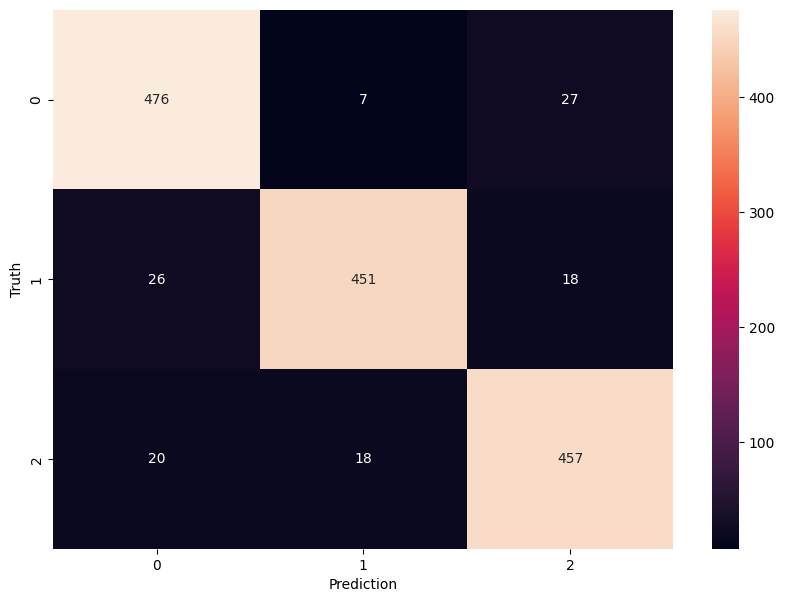

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')